# Looks at output of early coupled GEM runs

Using the coupler history file output at 3hr coupling interval

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.geoaxes import GeoAxes
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import fstd2nc
import cftime
#import iris
#import iris.analysis.cartography
#import iris.plot as iplt
#import iris.quickplot as qplt

/home/ncs001/.conda/envs/gem-vis/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:


#ds_cpl_his = xr.open_dataset('/space/hall6/sitestore/eccc/crd/ccrn/ccrn_tmp/rcs001/gem_test_bus_update_3718073/work/cpl_history.nc')
#ds_cpl_his = xr.open_dataset('/space/hall6/sitestore/eccc/crd/ccrn/ccrn_tmp/rcs001/canesm5.2rc_gem_test_3451105/work/cpl_history.nc')
#ds_cpl_his = xr.open_dataset('/space/hall6/sitestore/eccc/crd/ccrn/ccrn_tmp/rcs001/canesm5.2rc_gem_test_1390073/work/cpl_history.nc')
#ds_cpl_his = xr.open_dataset('/space/hall6/sitestore/eccc/crd/ccrn/ccrn_tmp/rcs001/canesm5.2rc_gem_test_2702758/work/cpl_history.nc')
ds_cpl_his = xr.open_dataset('/space/hall6/sitestore/eccc/crd/ccrn/ccrn_tmp/rcs001/scatter_fix_canesm5.2rc_gem_test_145912/work/cpl_history.nc')

In [8]:
ds_cpl_his

<xarray.Dataset>
Dimensions:          (time: 2921, nlat_atm_yin: 115, nlon_atm_yin: 303,
                      nlat_atm_yang: 115, nlon_atm_yang: 303, nlat_ocn: 292,
                      nlon_ocn: 362)
Coordinates:
  * time             (time) datetime64[ns] 2003-01-01 ... 2004-01-01
Dimensions without coordinates: nlat_atm_yin, nlon_atm_yin, nlat_atm_yang,
                                nlon_atm_yang, nlat_ocn, nlon_ocn
Data variables: (12/74)
    lon_atm_yin      (nlat_atm_yin, nlon_atm_yin) float64 245.3 244.4 ... 67.72
    lat_atm_yin      (nlat_atm_yin, nlon_atm_yin) float64 -61.39 ... 4.525
    lon_atm_yang     (nlat_atm_yang, nlon_atm_yang) float64 201.4 ... 350.3
    lat_atm_yang     (nlat_atm_yang, nlon_atm_yang) float64 8.226 ... 40.99
    lon_ocn          (nlat_ocn, nlon_ocn) float64 ...
    lat_ocn          (nlat_ocn, nlon_ocn) float64 ...
    ...               ...
    O_Wind10         (time, nlat_ocn, nlon_ocn) float64 ...
    O_dQnsdT         (time, nlat_ocn, nlon_ocn) float64 ...
    O_Runoff         (time, nlat_ocn, nlon_ocn) float64 ...
    O_AtmCO2         (time, nlat_ocn, nlon_ocn) float64 ...
    O_MSLP           (time, nlat_ocn, nlon_ocn) float64 ...
    GTICE_ocn        (time, nlat_ocn, nlon_ocn) float64 ...
Attributes:
    CCCma_runid:  default

In [9]:
2921*3/24

365.125

In [4]:
def plot_nemo_field(nemo_lon, nemo_lat, nemo_field, **kwargs):
    '''Plot NEMO fields. Does not work well without using iris. '''
    data_crs = ccrs.PlateCarree()
    fig = plt.figure(figsize=(8,14))
    axes_class = (GeoAxes,
                      dict(projection=data_crs))
    grid = AxesGrid(fig, 111, axes_class=axes_class,
                        nrows_ncols=(1, 1),
                        axes_pad=0.25,
                        cbar_location='right',
                        cbar_mode='single',
                        cbar_pad=0.1,
                        cbar_size='3%',
                        label_mode='')  # note the empty label_modead=0.05

    axl = grid[0]
    cm=axl.contourf(nemo_lon, nemo_lat, nemo_field,transform=data_crs, **kwargs)
    axl.coastlines(linewidth=0.1)  
    grid.cbar_axes[0].colorbar(cm,extend='both')

In [13]:
def plot_yg_fields(yin_rlon, yin_rlat, yin_field, yan_rlon, yan_rlat, yan_field, **kwargs):
    '''Create a compound figure of Yin/Yang panels, plotted in rotated coordinates.
    '''
    fig = plt.figure(figsize=(8,14))

    rotated_yan = ccrs.RotatedPole(pole_latitude=8.050,pole_longitude=352.579, central_rotated_longitude=180)
    rotated_yin = ccrs.RotatedPole(pole_latitude=31.758,pole_longitude=87.597)
    data_crs = ccrs.PlateCarree()

    axes_class = (GeoAxes,
                      dict(projection=data_crs))


    grid = AxesGrid(fig, 111, axes_class=axes_class,
                        nrows_ncols=(2, 1),
                        axes_pad=0.25,
                        cbar_location='right',
                        cbar_mode='single',
                        cbar_pad=0.1,
                        cbar_size='3%',
                        label_mode='')  # note the empty label_modead=0.05

    axl = grid[0]
    axl.contourf(yin_rlon, yin_rlat, yin_field,transform=rotated_yin, **kwargs)
    axl.coastlines(linewidth=0.1)  

    axr = grid[1]
    cm = axr.contourf(yan_rlon+180, yan_rlat, yan_field, transform=rotated_yan, **kwargs)
    axr.coastlines(linewidth=0.1)
    grid.cbar_axes[0].colorbar(cm,extend='both')

In [6]:
def plot_yg_fields_true(yin_lon, yin_lat, yin_field, yan_lon, yan_lat, yan_field, **kwargs):
    '''Create a compound figure of Yin/Yang panels, plotted in rotated coordinates.
    '''
    fig = plt.figure(figsize=(8,14))

    rotated_yan = ccrs.RotatedPole(pole_latitude=8.050,pole_longitude=352.579, central_rotated_longitude=180)
    rotated_yin = ccrs.RotatedPole(pole_latitude=31.758,pole_longitude=87.597)
    data_crs = ccrs.PlateCarree()

    axes_class = (GeoAxes,
                      dict(projection=data_crs))


    grid = AxesGrid(fig, 111, axes_class=axes_class,
                        nrows_ncols=(2, 1),
                        axes_pad=0.25,
                        cbar_location='right',
                        cbar_mode='single',
                        cbar_pad=0.1,
                        cbar_size='3%',
                        label_mode='')  # note the empty label_modead=0.05

    axl = grid[0]
    axl.contourf(yin_lon, yin_lat, yin_field,transform=data_crs, **kwargs)
    axl.coastlines(linewidth=0.1)  

    axr = grid[1]
    cm = axr.contourf(yan_lon, yan_lat, yan_field, transform=data_crs, **kwargs)
    axr.coastlines(linewidth=0.1)
    grid.cbar_axes[0].colorbar(cm,extend='both')

# Plot NEMO heat flux (BEGO)

In [7]:
# Read coordinates from a NEMO mesh file as coupler history ones are invalid
ds_mesh = xr.open_dataset('/home/ncs001/site5/gemdc-tests/yy_out/mc_ncs-pict-02_6001_m01_mesh_mask.nc')

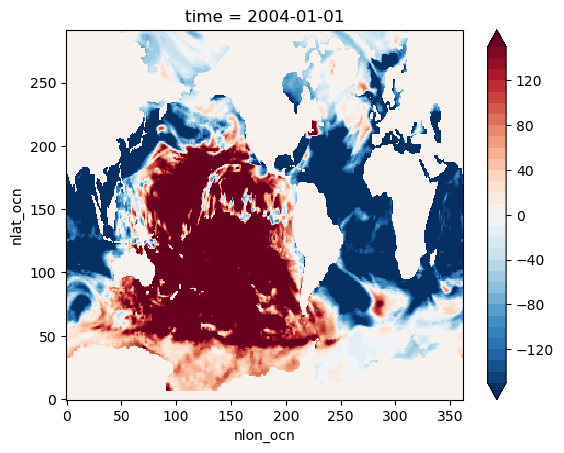

In [13]:
# plot the data on the NEMO grid. Projecting it does not work well in cartopy - you must remap or use iris.
# For the last timestep
bego_nemo = (ds_cpl_his.O_QsrMix + ds_cpl_his.O_QnsMix)
bego_nemo.isel(time=2920).plot(cmap='RdBu_r', levels=np.arange(-150,160,10))

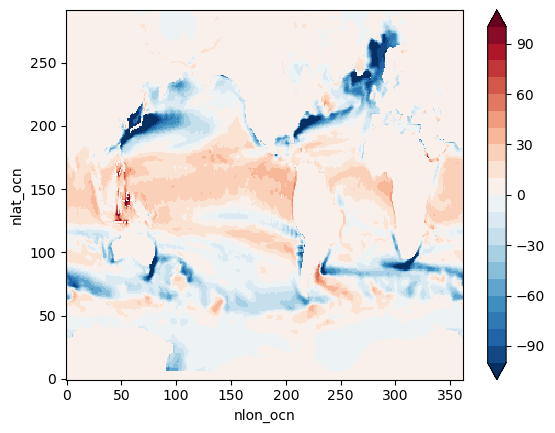

In [15]:
# On average
bego_nemo.mean(dim='time').plot(cmap='RdBu_r', levels=np.arange(-100,110,10))

# Plot YG data (BEGO)

In [14]:
# These are outputs from a CanAM-GEM AMIP run on the 303x115 grid
ds_amip_yin = xr.open_dataset('/home/ncs001/site5/gemdc-tests/yy_out/yy_out_ng/BEGO_2003010100_00000006_yin.nc')
ds_amip_yan = xr.open_dataset('/home/ncs001/site5/gemdc-tests/yy_out/yy_out_ng/BEGO_2003010100_00000006_yan.nc')

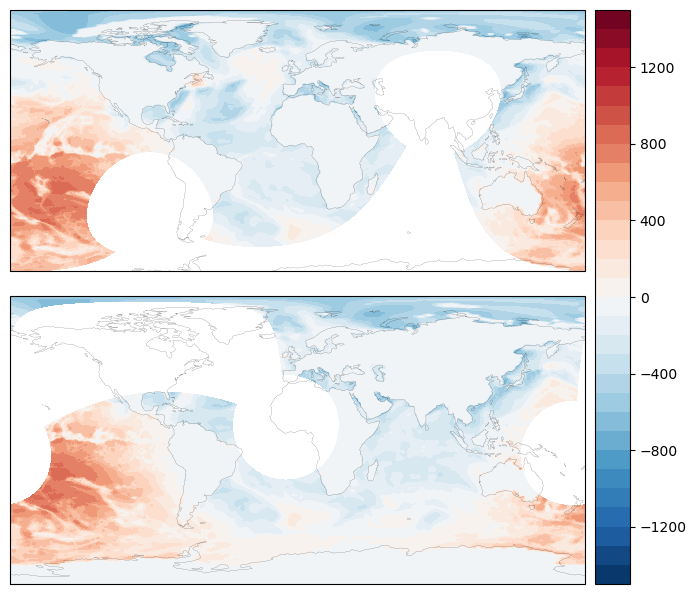

In [11]:
# Use AMIP rlon/rlat along with the coupler history file fields to make sensible plots
# For the last step
plot_yg_fields(ds_amip_yin.rlon, ds_amip_yin.rlat, ds_cpl_his.BEGO_atm_yin.isel(time=2920), 
               ds_amip_yan.rlon, ds_amip_yan.rlat, ds_cpl_his.BEGO_atm_yang.isel(time=2920), 
               cmap='RdBu_r', levels=np.arange(-1500,1600,100))

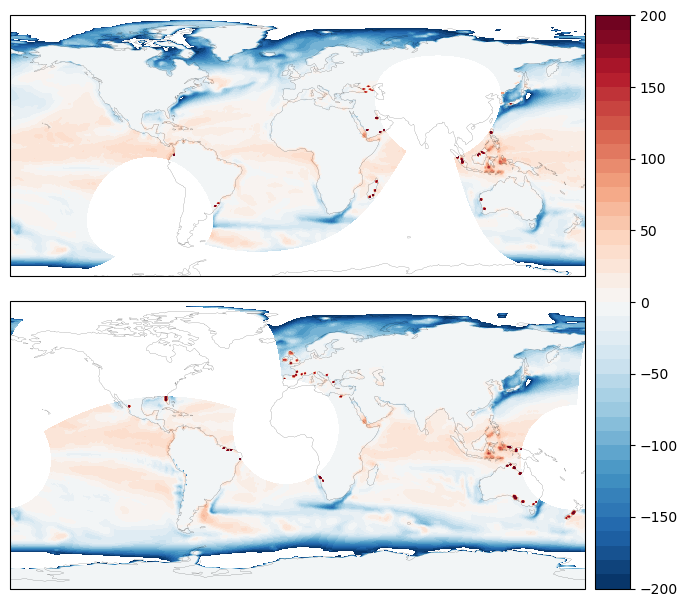

In [16]:
# On average
# Use AMIP rlon/rlat along with the coupler history file fields to make sensible plots
plot_yg_fields(ds_amip_yin.rlon, ds_amip_yin.rlat, ds_cpl_his.BEGO_atm_yin.mean(dim='time'), 
               ds_amip_yan.rlon, ds_amip_yan.rlat, ds_cpl_his.BEGO_atm_yang.mean(dim='time'), 
               cmap='RdBu_r', levels=np.arange(-200,210,10))


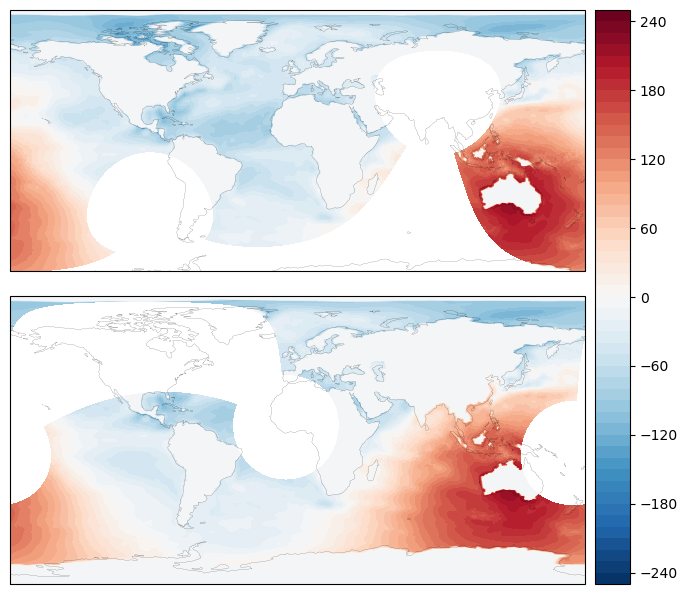

In [ ]:
# Output of BEGO from the AMIP run, for comparison (note this is a timestrp snapshot, and the above is a 3hr average, so smoother / smaller)
plot_yg_fields(ds_amip_yin.rlon, ds_amip_yin.rlat, ds_amip_yin.BEGO.isel(time=0), 
               ds_amip_yan.rlon, ds_amip_yan.rlat, ds_amip_yan.BEGO.isel(time=0), 
               cmap='RdBu_r', levels=np.arange(-250,260,10))

# Look at GT

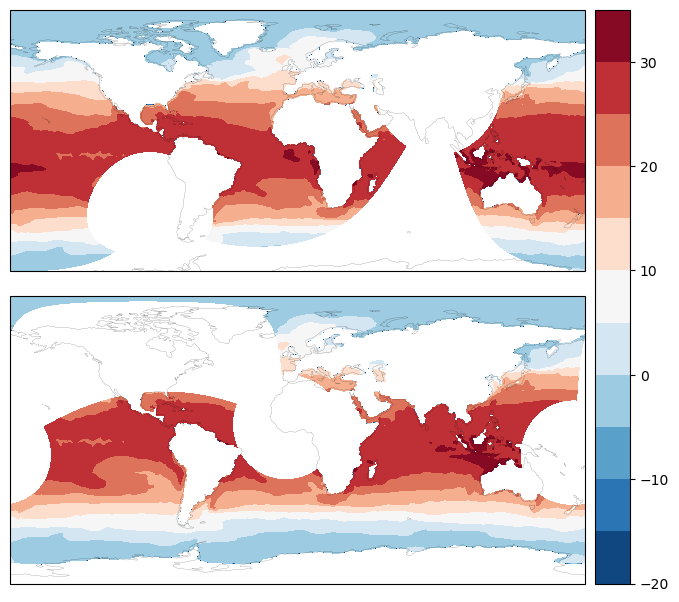

In [ ]:
# Use AMIP rlon/rlat along with the coupler history file fields to make sensible plots
# For the last step
plot_yg_fields(ds_amip_yin.rlon, ds_amip_yin.rlat, ds_cpl_his.GT_atm_yin.isel(time=1)-273.15, 
               ds_amip_yan.rlon, ds_amip_yan.rlat, ds_cpl_his.GT_atm_yang.isel(time=1)-273.15, 
               cmap='RdBu_r', levels=np.arange(-20,40,5))